Chapter 14

# 主成分分析，照片
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load image
# img = plt.imread("iris_photo.jpg")

# # Donwsample and encode RGBa image as matrix of intensities, X
# DOWNSAMPLE = 4
# R = img[::DOWNSAMPLE, ::DOWNSAMPLE, 0]
# G = img[::DOWNSAMPLE, ::DOWNSAMPLE, 1]
# B = img[::DOWNSAMPLE, ::DOWNSAMPLE, 2] 
# X = 0.2989 * R + 0.5870 * G + 0.1140 * B

from skimage import color
from skimage import io

In [2]:
X = color.rgb2gray(io.imread('iris_photo.jpg'))
# DOWNSAMPLE = 5
# X = X[::DOWNSAMPLE, ::DOWNSAMPLE]
# Calculate the rank of the data matrix, X

In [3]:
# Run SVD on Image
U, S, V = np.linalg.svd(X)

n_components = len(S)
component_idx = range(1,  n_components + 1)

lambda_i = np.square(S)/(X.shape[0] - 1)
# approximation, given that X is not centered

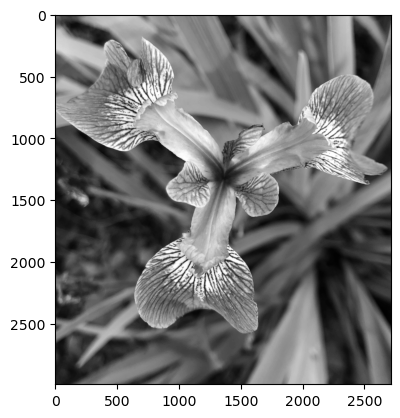

In [4]:
# Visualizations
fig, axs = plt.subplots()

## Raw Image, X （down-sampled)
plt.imshow(X, cmap='gray')

Text(0, 0.5, 'Singular value')

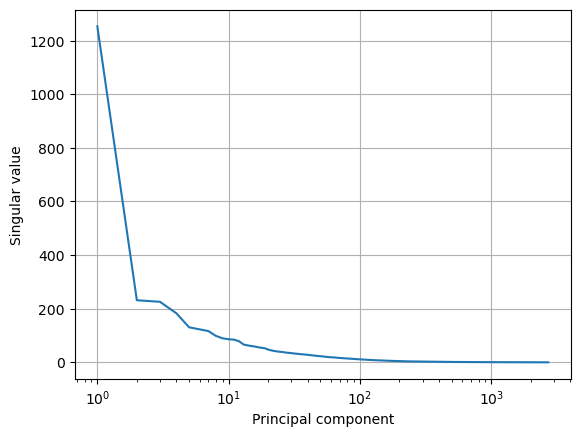

In [5]:
## Singular values 
fig, ax = plt.subplots()

### Raw singular values
plt.plot(component_idx, S)
plt.grid()
ax.set_xscale('log')
plt.xlabel("Principal component")
plt.ylabel('Singular value')

Text(0, 0.5, 'Eigen value')

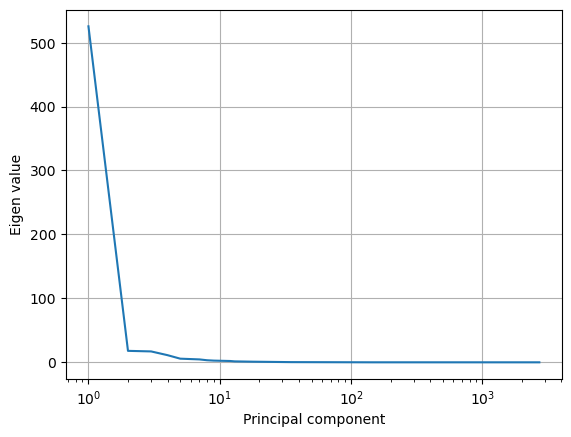

In [6]:
## Eigen value
fig, ax = plt.subplots()

### Raw singular values
plt.plot(component_idx, lambda_i)
plt.grid()
ax.set_xscale('log')
plt.xlabel("Principal component")
plt.ylabel('Eigen value')

In [7]:
# Calculate the cumulative variance explained
variance_explained = 100 * np.cumsum(lambda_i) / lambda_i.sum()

Text(0, 0.5, 'Cumulative variance explained (%)')

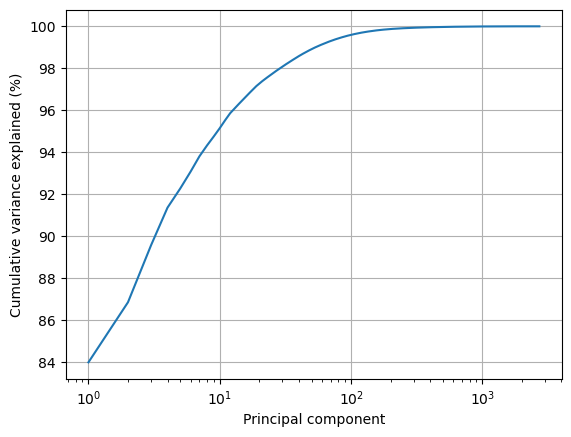

In [8]:
fig, ax = plt.subplots()
plt.plot(component_idx, variance_explained)
ax.set_xscale('log')
plt.xlabel("Principal component")
plt.grid()
plt.ylabel('Cumulative variance explained (%)')

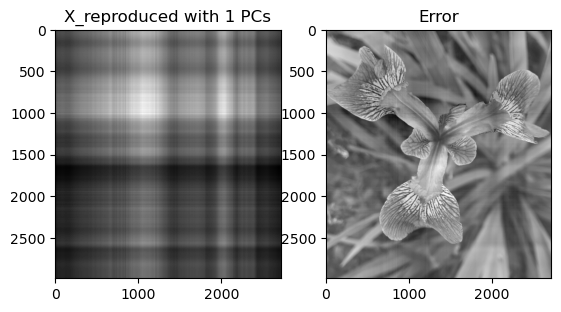

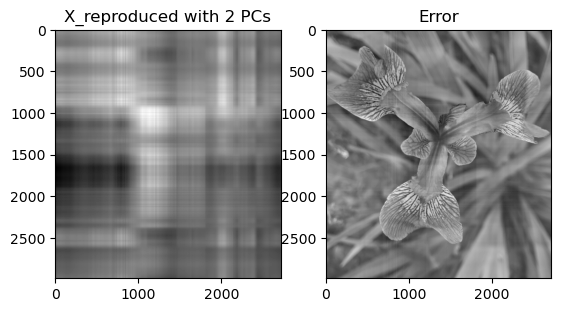

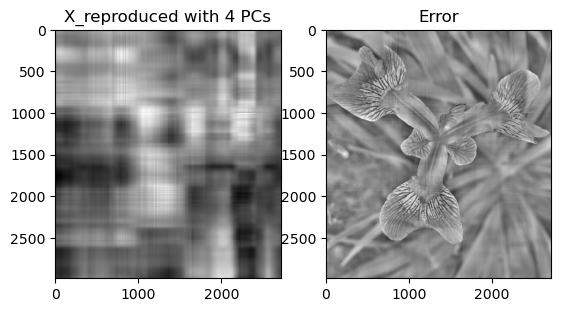

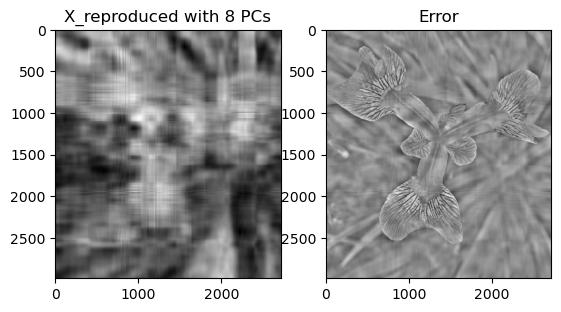

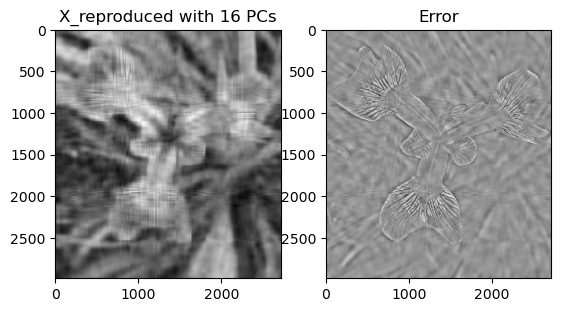

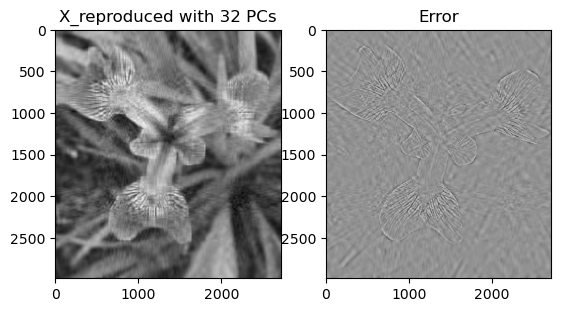

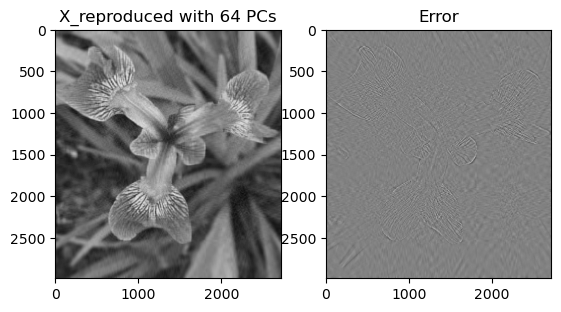

In [9]:
#%% Image Reconstruction

# Reconstruct image with increasing number of singular vectors/values
for rank in [1, 2, 4, 8, 16, 32, 64]:

    # Reconstructed Image
    X_reconstruction = U[:, :rank] * S[:rank] @ V[:rank,:]
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(X_reconstruction, cmap='gray')
    axs[0].set_title('X_reproduced with ' + str(rank) + ' PCs')

    ## Reconstruction error

    axs[1].imshow(X - X_reconstruction, cmap='gray')
    axs[1].set_title('Error')